<h1>THÊM THƯ VIỆN</h1>
pip install pmdarima -- Cài đặt thư viện

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<h1>NẠP DỮ LIỆU</h1>

In [2]:
data = pd.read_csv("../../dataset/ERIC.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,9.53,9.55,9.46,9.51,7.065709,4605000
1,2010-01-05,9.73,9.73,9.57,9.63,7.154866,2712300
2,2010-01-06,9.59,9.86,9.59,9.80,7.281172,7549900
3,2010-01-07,9.85,9.92,9.79,9.85,7.318321,4609700
4,2010-01-08,9.81,9.84,9.72,9.81,7.288602,6119200
...,...,...,...,...,...,...,...
3370,2023-05-24,5.20,5.20,5.10,5.12,5.120000,8097000
3371,2023-05-25,5.17,5.18,5.11,5.14,5.140000,5712100
3372,2023-05-26,5.16,5.27,5.16,5.25,5.250000,7995900
3373,2023-05-30,5.27,5.28,5.20,5.22,5.220000,5580500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3375 entries, 0 to 3374
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3375 non-null   object 
 1   Open       3375 non-null   float64
 2   High       3375 non-null   float64
 3   Low        3375 non-null   float64
 4   Close      3375 non-null   float64
 5   Adj Close  3375 non-null   float64
 6   Volume     3375 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 184.7+ KB


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3375 entries, 0 to 3374
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3375 non-null   datetime64[ns]
 1   Open       3375 non-null   float64       
 2   High       3375 non-null   float64       
 3   Low        3375 non-null   float64       
 4   Close      3375 non-null   float64       
 5   Adj Close  3375 non-null   float64       
 6   Volume     3375 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 184.7 KB


In [5]:
for i in range(len(data["Date"])):
      data["Date"][i]= data["Date"][i].strftime('%Y-%m-%d')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,9.53,9.55,9.46,9.51,7.065709,4605000
1,2010-01-05,9.73,9.73,9.57,9.63,7.154866,2712300
2,2010-01-06,9.59,9.86,9.59,9.80,7.281172,7549900
3,2010-01-07,9.85,9.92,9.79,9.85,7.318321,4609700
4,2010-01-08,9.81,9.84,9.72,9.81,7.288602,6119200
...,...,...,...,...,...,...,...
3370,2023-05-24,5.20,5.20,5.10,5.12,5.120000,8097000
3371,2023-05-25,5.17,5.18,5.11,5.14,5.140000,5712100
3372,2023-05-26,5.16,5.27,5.16,5.25,5.250000,7995900
3373,2023-05-30,5.27,5.28,5.20,5.22,5.220000,5580500


In [6]:
data.set_index('Date',inplace=True)

In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3.375000e+03
mean,9.729556,9.810536,9.646370,9.728969,8.456300,5.835431e+06
std,2.355246,2.368970,2.338596,2.352608,1.911352,4.444487e+06
min,4.830000,4.890000,4.830000,4.850000,4.362357,5.402000e+05
25%,7.895000,7.960000,7.810000,7.910000,7.150841,3.127350e+06
50%,9.750000,9.840000,9.660000,9.750000,8.252408,4.647400e+06
75%,11.785000,11.850000,11.675000,11.760000,9.854422,7.032500e+06
max,15.290000,15.440000,15.210000,15.380000,13.913423,5.799540e+07


<h1>DATA ANALYSIS</h1>

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = data.index, y = data.High,
                    mode='lines',
                    name='High',
                    marker_color = '#2CA02C',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = data.index, y = data.Low,
                    mode='lines',
                    name='Low',
                    marker_color = '#D62728',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = data.index, y = data.Open,
                    mode='lines',
                    name='Open',
                    marker_color = '#FF7F0E',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = data.index, y = data.Close,
                    mode='lines',
                    name='Close',
                    marker_color = '#1F77B4'))

fig.update_layout(
    title='Microsoft history',
    titlefont_size = 28,
    
    xaxis = dict(
        title='Date',
        tickmode="array",
        tickvals=[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        ticktext=[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        titlefont_size=16,
        tickfont_size=14),
    
    height = 800,
    
    yaxis=dict(
        title='Prices',
        titlefont_size=16,
        tickfont_size=14),
    
    legend=dict(
        y=0,
        x=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'))

fig.show()

<Axes: title={'center': 'Biến động giá cổ phiếu'}, xlabel='Dates', ylabel='Dollars'>

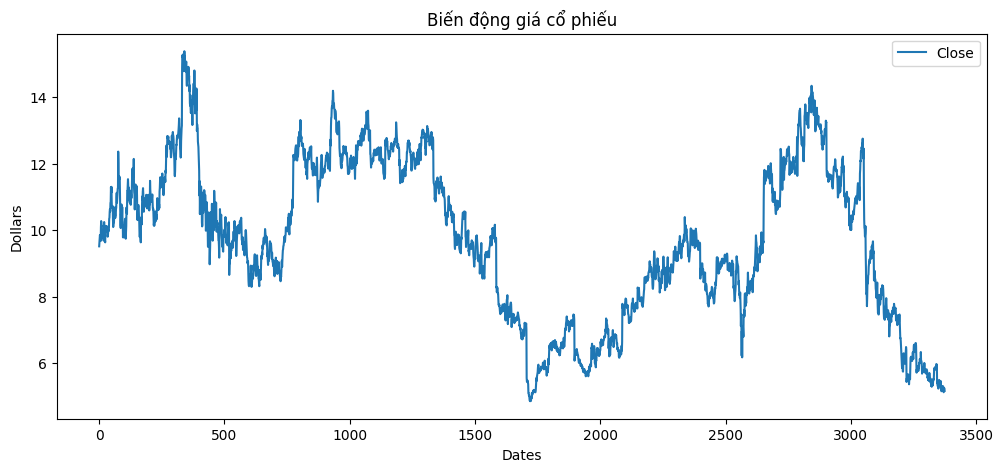

In [9]:
df = data[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

title ='Biến động giá cổ phiếu'
ylabel='Dollars'
xlabel='Dates'
df.plot(figsize=(12,5),title=title,xlabel=xlabel, ylabel=ylabel)

In [10]:
# 2. chia train test validate theo tỉ lệ 7:1:2
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

<h1>XÂY DỰNG MÔ HÌNH ARIMA</h1>
<h3>Dựa vào chỉ số AIC</h3>
Chỉ số AIC càng thấp thì mô hình càng phù hợp

In [11]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Sử dụng hàm auto_arima để tìm kiếm mo hình ARIMA tốt nhất
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-774.052, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-766.081, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-773.139, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-773.141, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-768.078, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-775.597, Time=1.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-771.141, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-771.139, Time=0.76 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-775.245, Time=2.68 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-772.003, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-769.142, Time=0.31 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-772.594, Time=3.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-777.596, Time=0.39 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-773.138, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]          

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [12]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

In [13]:
# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [14]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[10.02215222 10.00995391  9.99907768  9.98938024  9.98073382  9.97302452
  9.96615077  9.96002201  9.9545575   9.94968524  9.94534105  9.94146768
  9.93801413  9.93493487  9.93218935  9.9297414   9.92755876  9.92561268
  9.92387751  9.92233041  9.92095099  9.91972107  9.91862445  9.91764669
  9.9167749   9.91599759  9.91530453  9.91468659  9.91413562  9.91364436]


In [15]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mae = np.mean(np.abs(y_pred - y_test))
mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('MAE:', mae)
print('MAPE:', mape)

Validation RMSE: 3.320751919530019
Testing RMSE: 1.9508745634525937
MAE: 1.6931552690637066
MAPE: 15.798777202622464


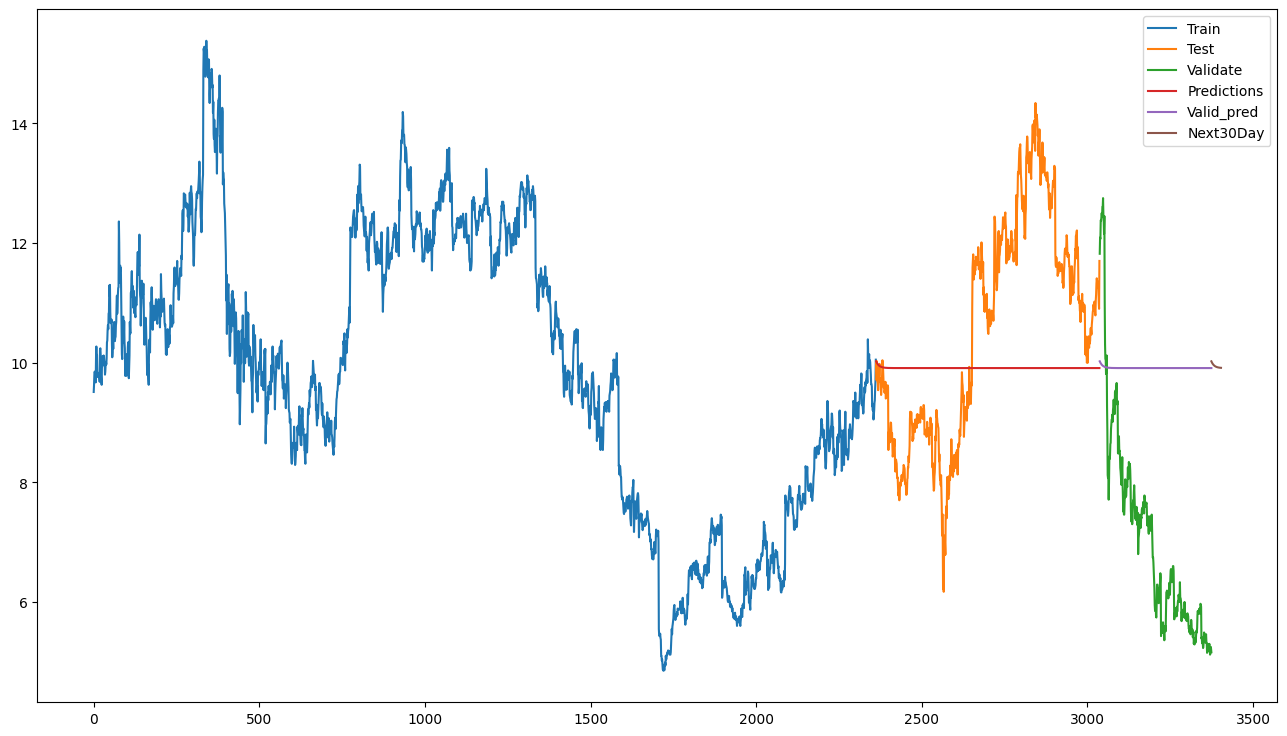

In [16]:
# 8.Vẽ hình
plt.figure(figsize=(16,9))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions','Valid_pred','Next30Day'])
plt.show()

In [17]:
test_data.index

RangeIndex(start=2362, stop=3037, step=1)